<a href="https://colab.research.google.com/github/Lakshmanaraja/Bear-Classifier-FastAI-Pytorch/blob/main/Bear_Classifier_using_PyTorch_and_Fast_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Course Work from Fast.AI**

*   This is part of my course work from FAST.AI Course ( Jeremy Howard and Sylvaian)
*   Actual course material Imported data from bing search
*   I have imported data from Kaggle dataset
*   Also cleaned and reworked to have a simplest way 





# **Setting up the environment**

In [1]:
!pip install -Uqq fastbook
!pip install kaggle

     |████████████████████████████████| 720 kB 5.2 MB/s 
     |████████████████████████████████| 1.2 MB 37.7 MB/s 
     |████████████████████████████████| 189 kB 50.7 MB/s 
     |████████████████████████████████| 48 kB 4.2 MB/s 
     |████████████████████████████████| 55 kB 4.0 MB/s 
     |████████████████████████████████| 51 kB 309 kB/s 
     |████████████████████████████████| 558 kB 45.7 MB/s 
     |████████████████████████████████| 130 kB 44.9 MB/s 


In [2]:
import fastbook
from fastbook import *
from fastai.vision.widgets import *

# **Data Preparation**

**Using Kaggle API**

In [3]:
creds =' {"username":"lakshmanarajak","key":"e88bdc2a58e339ce6863757a660f81ce"}'  

In [4]:
cred_path = Path('~/.kaggle/kaggle.json').expanduser()
print(cred_path)
if not cred_path.exists():
    cred_path.parent.mkdir(exist_ok=True)
    cred_path.write_text(creds)
    cred_path.chmod(0o600)

/root/.kaggle/kaggle.json


In [5]:
from kaggle import api

**Download DataSet from Kaggle**

In [6]:
!kaggle datasets download -d anirudhg15/bears-fastai-2021 #Downloading Datasets 

 98% 267M/272M [00:02<00:00, 120MB/s]
100% 272M/272M [00:02<00:00, 107MB/s]


**Image files moved to working directory**

In [7]:
path = URLs.path('bears')
path
Path.BASE_PATH = path

In [8]:
zipfile.ZipFile('/content/bears-fastai-2021.zip').extractall()
bear_types = 'grizzly','black','teddy'
path = Path('bears')

In [9]:
fns = get_image_files(path)
fns

(#288) [Path('bears/teddy/00000039.jpg'),Path('bears/teddy/00000008.jpg'),Path('bears/teddy/00000077.jpg'),Path('bears/teddy/00000089.jpg'),Path('bears/teddy/00000033.jpg'),Path('bears/teddy/00000012.jpg'),Path('bears/teddy/00000094.jpg'),Path('bears/teddy/00000093.jpg'),Path('bears/teddy/00000050.jpg'),Path('bears/teddy/00000011.jpg')...]

## Loading Data in to the model and splitting

In [10]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock),  #Independent variable is image and Dependent is category
    get_items=get_image_files, # Image files
    splitter=RandomSplitter(valid_pct=0.2, seed=42), # Train and Validation split
    get_y=parent_label, # 
    item_tfms=Resize(128)) # Resize Transformation

In [11]:
dls = bears.dataloaders(path) #Data Loader object

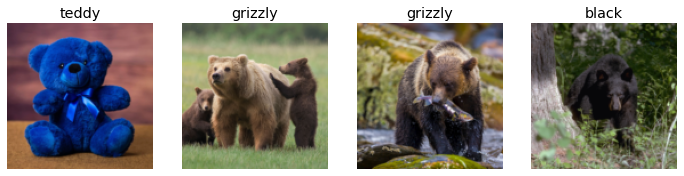

In [12]:
dls.valid.show_batch(max_n=4, nrows=1) #Samples from validation set

In [13]:
bears = bears.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = bears.dataloaders(path)

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1051: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  ../aten/src/ATen/native/BatchLinearAlgebra.cpp:766.)
  ret = func(*args, **kwargs)


# **Fitting the model using Transfer Learning**

In [14]:
learn = cnn_learner(dls, resnet18, metrics=error_rate) #
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.484257,0.305140,0.175439,00:24


epoch,train_loss,valid_loss,error_rate,time
0,0.323642,0.111233,0.035088,00:24
1,0.253161,0.039524,0.017544,00:23
2,0.196022,0.016881,0.017544,00:25
3,0.152249,0.005950,0.000000,00:24


# **Confusion Matrix to verify performance**

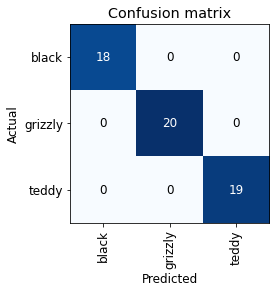

In [15]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

# **Data Cleaning to improve perfornamce**

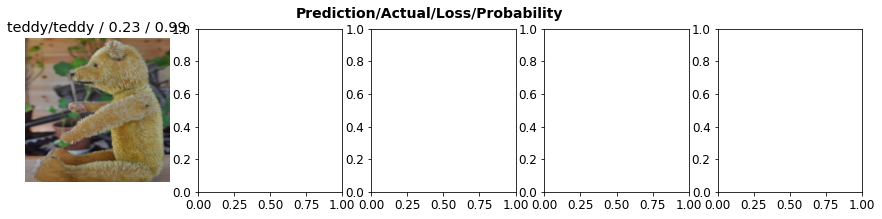

In [16]:
interp.plot_top_losses(5, nrows=1)

In [17]:

cleaner = ImageClassifierCleaner(learn)
cleaner

In [ ]:
#hide
#for idx in cleaner.delete(): cleaner.fns[idx].unlink()
# for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat

# **Loading Image to Test the application**

In [19]:
#image used to test the model

ims = ['http://3.bp.blogspot.com/-S1scRCkI3vY/UHzV2kucsPI/AAAAAAAAA-k/YQ5UzHEm9Ss/s1600/Grizzly%2BBear%2BWildlife.jpg']
dest = 'images/grizzly.jpg'
download_url(ims[0], dest) #create a folder images and store the image

Path('images/grizzly.jpg')

# **Export and Testing the Model**

In [20]:
learn.export()

Let's check that the file exists, by using the `ls` method that fastai adds to Python's `Path` class:

In [21]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [22]:
learn_inf = load_learner(path/'export.pkl')

In [23]:
learn_inf.predict('images/grizzly.jpg')

('grizzly', TensorBase(1), TensorBase([1.1144e-06, 1.0000e+00, 4.6785e-07]))

In [24]:
learn_inf.dls.vocab

['black', 'grizzly', 'teddy']

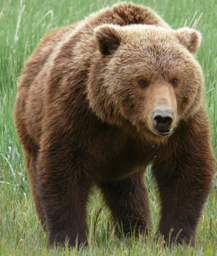

In [ ]:
im = Image.open(dest)
im.to_thumb(256,256)